In [100]:
#Adapted from https://towardsdatascience.com/step-by-step-guide-building-a-prediction-model-in-python-ac441e8b9e8b
#changed stock data input
#removed extra functions for adding and then removing date index
#update MinMaxScaler code by removing unnecessary drop functions/indexing
#solved Numpy error with x/y_train_data by converting to dataframes & importing keras thru tensorflow

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import tensorflow.keras as keras

In [61]:
fut_list = ['ZT=F']
df= yf.download(fut_list, start="2000-11-01", end="2023-02-05")['Close']

[*********************100%***********************]  1 of 1 completed


In [63]:
df = pd.DataFrame(data=df)
df

,Close
Date,
2000-11-01,100.156250
2000-11-02,100.162498
2000-11-03,100.037498
2000-11-06,99.974998
2000-11-07,99.974998
...,...
2023-01-30,102.730469
2023-01-31,102.824219
2023-02-01,103.011719


,Date,Close
0,2000-11-01,100.156250
1,2000-11-02,100.162498
2,2000-11-03,100.037498
3,2000-11-06,99.974998
4,2000-11-07,99.974998
...,...,...
5580,2023-01-30,102.730469
5581,2023-01-31,102.824219
5582,2023-02-01,103.011719
5583,2023-02-02,103.054688


In [57]:
df.index = df['Date']

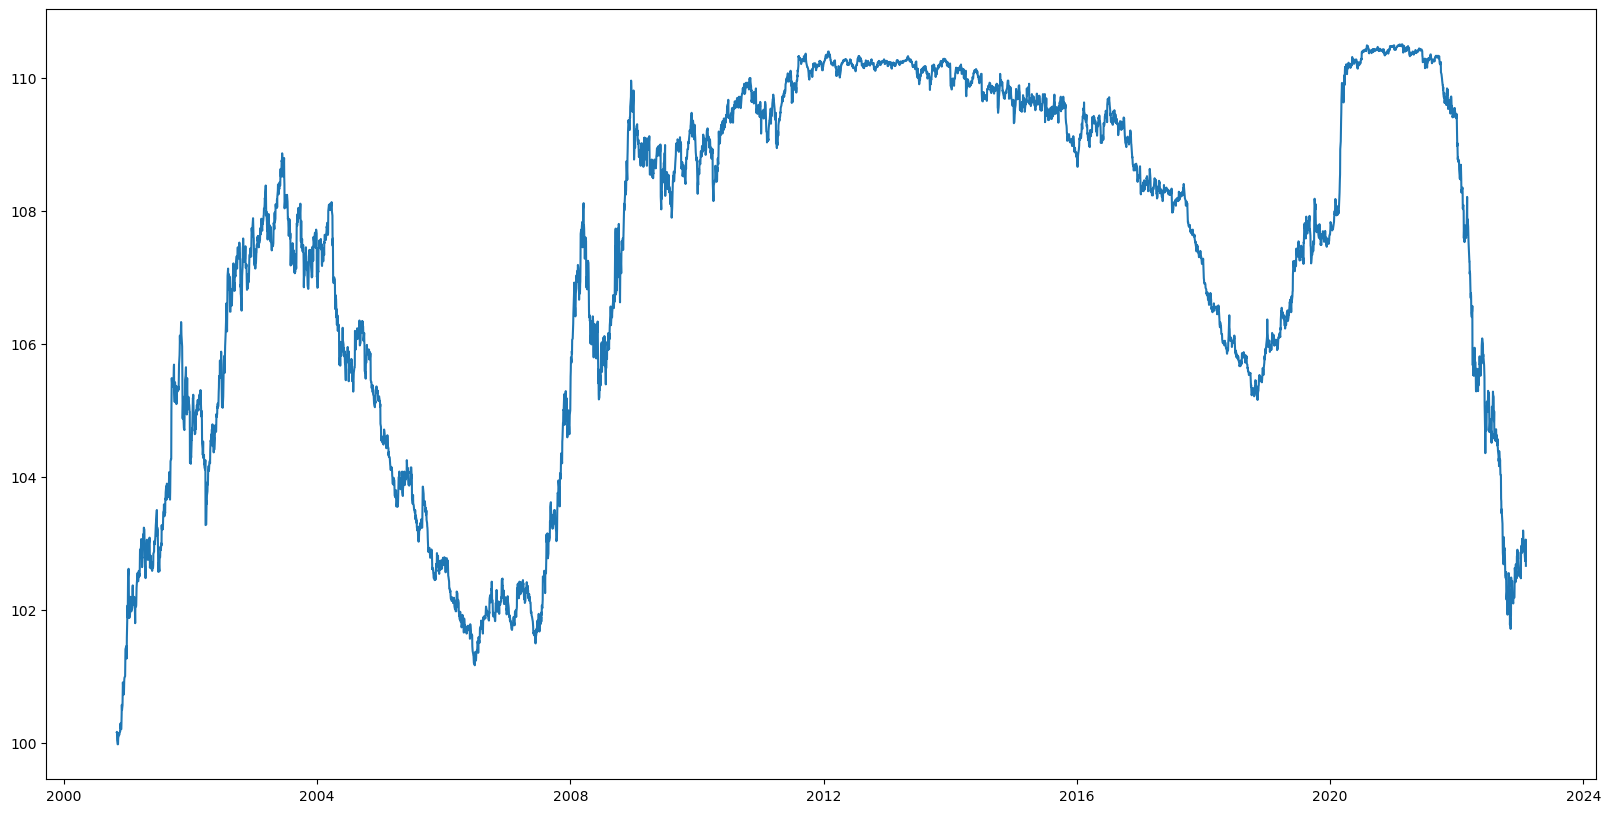

In [64]:
plt.plot(df["Close"],label='Close Price history')

In [71]:
data = df
data.dtypes

Close    float64
dtype: object

In [68]:
scaler=MinMaxScaler(feature_range=(0,1))
final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])


In [85]:
x_train_data = pd.DataFrame(data = x_train_data )
y_train_data = pd.DataFrame(data = y_train_data)

In [75]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [76]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

140/140 - 5s - loss: 0.0021 - 5s/epoch - 36ms/step


In [77]:
predicted_stock_price=lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

169/169 [==============================] - 2s 8ms/step


In [97]:
train_data=data[:200]
valid_data=data[200:]
valid_data


,Close
Date,
2001-09-06,104.015625
2001-09-07,104.234375
2001-09-10,104.265625
2001-09-11,104.265625
2001-09-12,105.000000
...,...
2023-01-30,102.730469
2023-01-31,102.824219
2023-02-01,103.011719


C:\Users\Chetan\AppData\Local\Temp\ipykernel_25448\202580102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_stock_price


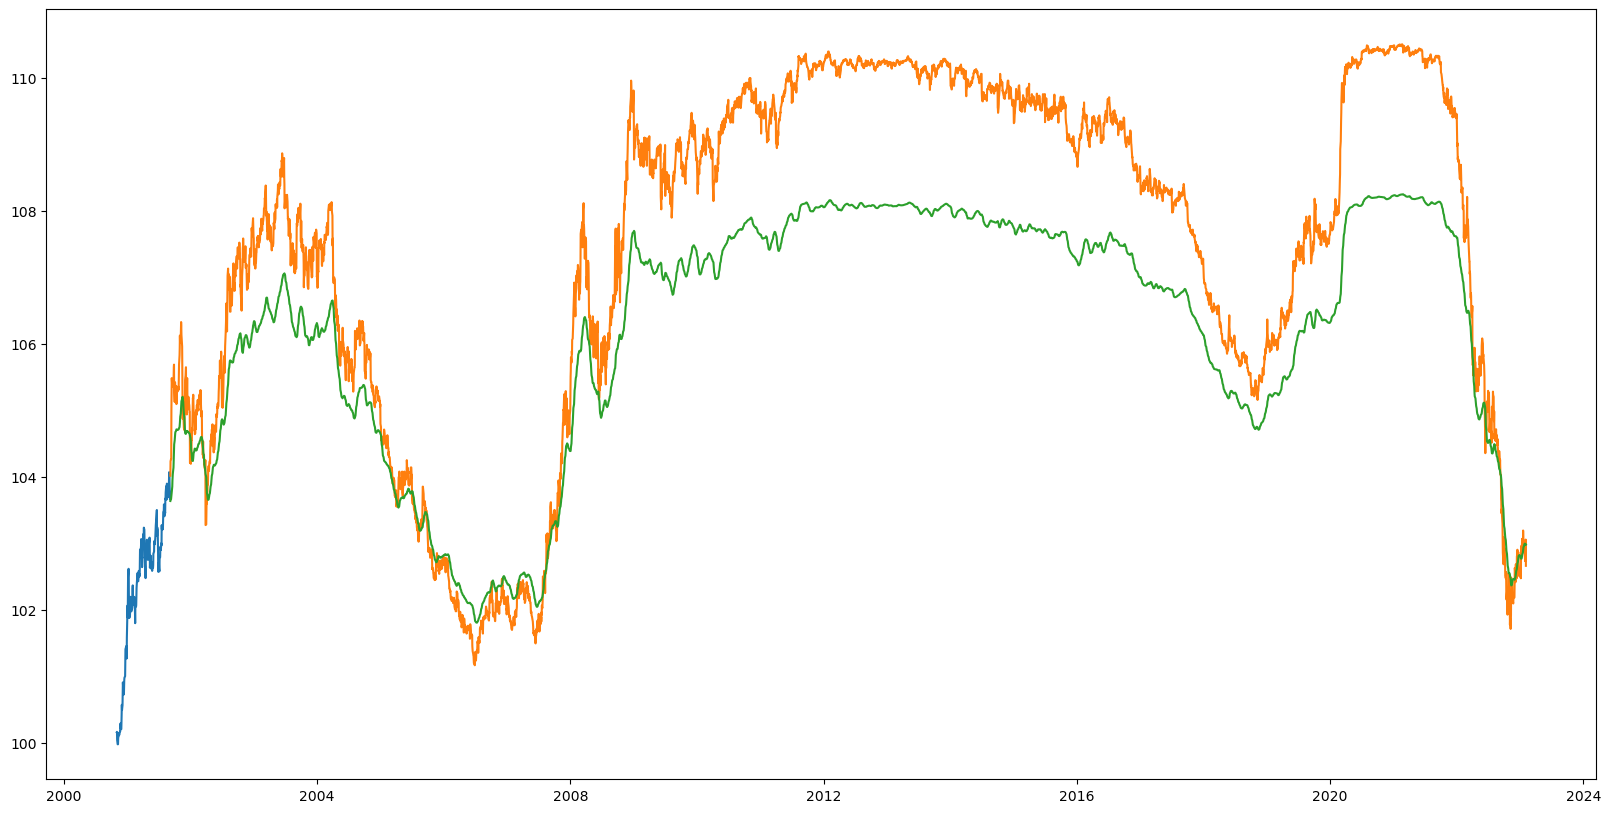

In [98]:
valid_data['Predictions']=predicted_stock_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])